This notebook assumes that you have **tensorflow** and **numpy** installed already.

In [2]:
!pip install keras

    100% |################################| 204kB 3.2MB/s 
    100% |################################| 3.1MB 348kB/s 
  Running setup.py bdist_wheel for keras ... - done
  Stored in directory: /root/.cache/pip/wheels/48/82/42/f06a8c03a8f95ada523a81ba723e89f059693e6ad868d09727
  Running setup.py bdist_wheel for theano ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/d5/5b/93/433299b86e3e9b25f0f600e4e4ebf18e38eb7534ea518eba13
Successfully built keras theano


# KERAS TUTORIAL

In [3]:
from keras.models import Sequential
# sequential: a linear stack of neural network layers - perfect for 
# feed-forward CNNs

Using TensorFlow backend.


In [4]:
from keras.layers import Dense, Dropout, Activation, Flatten
# core layers, used in almost every NN

In [5]:
from keras.layers import Convolution2D, MaxPooling2D
# CNN layers - help us efficiently train on image data

In [6]:
import numpy as np
np.random.seed(123) # for reproducibility

In [7]:
from keras.utils import np_utils
# utilities to help us transform data

# Using the MNIST dataset

In [8]:
from keras.datasets import mnist

In [9]:
# load pre-shuffled MNIST data into train and test sets 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
print(X_train.shape)

(60000, 28, 28)


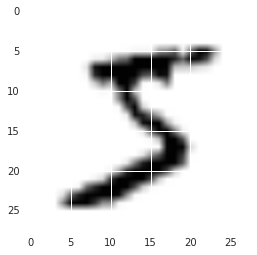

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## pre-process input data


In [12]:
#  must explicitly declare the dimensions of the data in Theano..

# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

"""EDIT: indeed different for tensorflow. When declaring input layer for tensorflow, dimensions given 
as (28, 28, 1) whereas in theano it would be (1, 28, 28)"""

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
print(X_train.shape)

(60000, 28, 28, 1)


In [14]:
# final pre-processing step: convert our data type to float32 and
# normalise our data to the range [0,1]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

## pre-process labels

In [15]:
print(y_train.shape)

(60000,)


We should have ten different classes, one for each digit, but it looks
like we only have a 1D array. Let's look at the first 10 training
samples

In [16]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


so we can see that the y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values. Have to fix that:

In [17]:
#  convert 1D array to 10D class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [18]:
print(Y_train.shape)

(60000, 10)


## define model architecture

In [19]:
#  declare a sequential model
model = Sequential()

In [20]:
#  declare input layer
"""NOTE input_shape: different formats depending on whether you are using the
tensorflow or theano backend."""
#  the step-size is (1,1) by default. can be tuned using the 'subsample' param.

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))

In [21]:
print(model.output_shape)
"""if theano, given as (None, 32, 26, 26)"""

(None, 26, 26, 32)


'if theano, given as (None, 32, 26, 26)'

In [22]:
#  now we can add more models

model.add(Convolution2D(32, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
# max pooling reduced the no. of params in our model. a 2x2 pooling 
# filter slides across the previous layer, taking the max of the 4 values.

model.add(Dropout(0.25))
# dropout layer regularises model to prevent overfitting.
# https://www.quora.com/How-does-the-dropout-method-work-in-deep-learning

In [23]:
#  to complete our model architecture, let's add a fully connected
# layer and then the output layer

model.add(Flatten())
# weights from convolutional layers must be flattened before passing them
# into a fully-connected dense layer. 

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# 0.5 is the probability of the neuron being dropped (dropout rate).

model.add(Dense(10, activation='softmax'))
# NOTE: final layer has an output size of 10, corresponding to the 10
# classes of the digits.

## compile model

In [25]:
"""when we compile the model, we declare the loss function 
and the optimizer (SGD, Adam, etc.)"""

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## fit model on training data

In [26]:
# declare the batch size and number of epochs to train for. pass
# in the training data

model.fit(X_train, Y_train,
         batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 362s - loss: 0.3012 - acc: 0.9077   
Epoch 2/10
60000/60000 [==============================] - 360s - loss: 0.1540 - acc: 0.9550   
Epoch 3/10
60000/60000 [==============================] - 394s - loss: 0.1328 - acc: 0.9629   
Epoch 4/10
60000/60000 [==============================] - 372s - loss: 0.1163 - acc: 0.9675   
Epoch 5/10
60000/60000 [==============================] - 359s - loss: 0.1083 - acc: 0.9699   
Epoch 6/10
60000/60000 [==============================] - 384s - loss: 0.1026 - acc: 0.9724   
Epoch 7/10
60000/60000 [==============================] - 398s - loss: 0.0899 - acc: 0.9751   
Epoch 8/10
60000/60000 [==============================] - 349s - loss: 0.0890 - acc: 0.9767   
Epoch 9/10
60000/60000 [==============================] - 385s - loss: 0.0851 - acc: 0.9775   
Epoch 10/10
60000/60000 [==============================] - 380s - loss: 0.0803 - acc: 0.9795   


## evaluate model on test data

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)